# Matplotlib Architecture & Basic Plotting

## 1. Understanding Matplotlib Architecture
- __Figure__ = The entire plot 
- __Axes__ = Individual plot areas 
- __Artist__ = Everything you see 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Setup plotting environment
plt.style.use('default')
%matplotlib inline

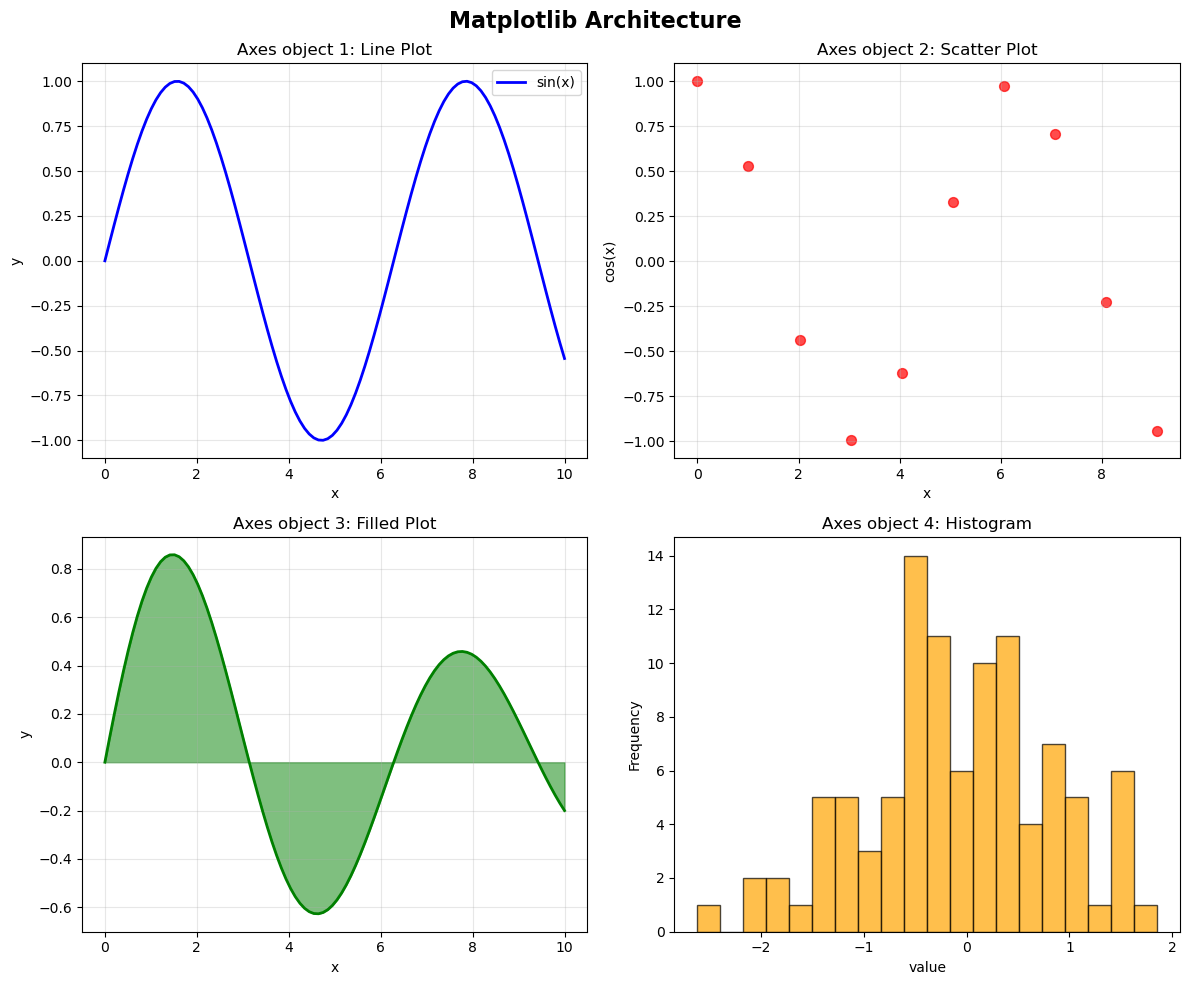

In [2]:
# generate sample dataset for practice
np.random.seed(42)
x = np.linspace(0, 10, 100)
y1 = np.sin(x)
y2 = np.cos(x)
y3 = np.sin(x) * np.exp(-x/10)
y4 = np.random.normal(0, 1, 100)

fig, axes = plt.subplots(2, 2, figsize = (12, 10))
fig.suptitle("Matplotlib Architecture", fontsize = 16, fontweight = 'bold')

# Plot on axis axes[0, 0]
axes[0, 0].plot(x, y1, '-b', linewidth = 2, label = "sin(x)")
axes[0, 0].set_title("Axes object 1: Line Plot")
axes[0, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[0, 0].grid(True, alpha = 0.3)
axes[0, 0].legend()

# Plot on axis axes[0, 1]
axes[0, 1].scatter(x[::10], y2[::10], c = 'red', s = 50, alpha = 0.7)
axes[0, 1].set_title("Axes object 2: Scatter Plot")
axes[0, 1].set_xlabel("x")
axes[0, 1].set_ylabel("cos(x)")
axes[0, 1].grid(True, alpha = 0.3)

# Plot on axis axes[1, 0]
axes[1, 0].plot(x, y3, '-g', linewidth = 2)
axes[1, 0].fill_between(x, 0, y3, color = 'green', alpha = 0.5)
axes[1, 0].set_title("Axes object 3: Filled Plot")
axes[1, 0].set_xlabel("x")
axes[1, 0].set_ylabel("y")
axes[1, 0].grid(True, alpha = 0.3)

# Plot on axis axes[1, ]
axes[1, 1].hist(y4, bins = 20, color = 'orange', alpha = 0.7, edgecolor = 'black')
axes[1, 1].set_title("Axes object 4: Histogram")
axes[1, 1].set_xlabel("value")
axes[1, 1].set_ylabel("Frequency")

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

## 2. Two Interfaces: pyplot vs Object-Oriented
- __pyplot interface__ - simple, intuitive, perfect for quick tasks
- __Object-oriented interface__ - more complex but gives complete control

__When to Use Each:__

- __pyplot__: Quick exploration, simple plots, Jupyter notebooks
- __Object-oriented__: Complex layouts, multiple subplots, production code

### pyplot Interface

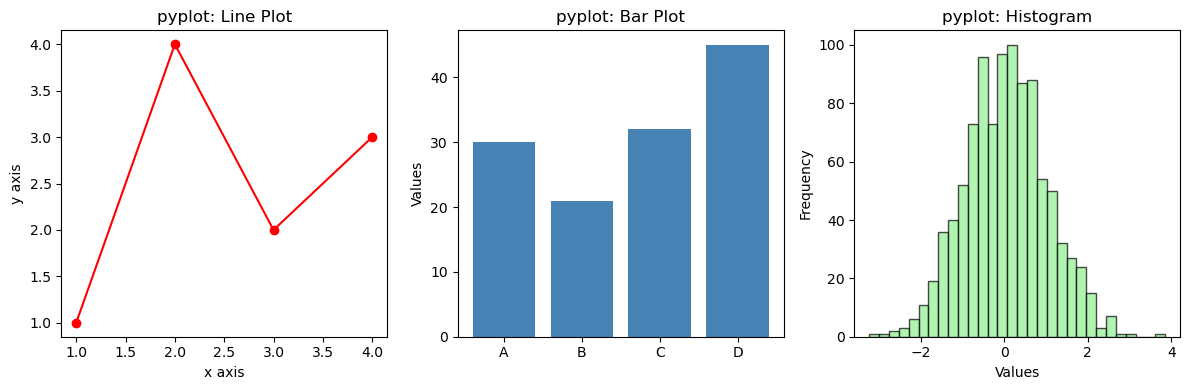

In [3]:
plt.figure(figsize = (12, 4))

# Subplot 1
plt.subplot(1, 3, 1)
plt.plot([1, 2, 3, 4], [1, 4, 2, 3], 'ro-')
plt.title("pyplot: Line Plot")
plt.xlabel("x axis")
plt.ylabel("y axis")

# Subplot 2
plt.subplot(1, 3, 2)
plt.bar(['A', 'B', 'C', 'D'], [30, 21, 32, 45], color = 'steelblue')
plt.title("pyplot: Bar Plot")
plt.ylabel("Values")

# Subplot 3
plt.subplot(1, 3, 3)
x = np.random.randn(1000)
plt.hist(x, bins = 30, color = 'lightgreen', alpha = 0.7, edgecolor = 'black')
plt.title("pyplot: Histogram")
plt.xlabel("Values")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

### Object Oriented Interface

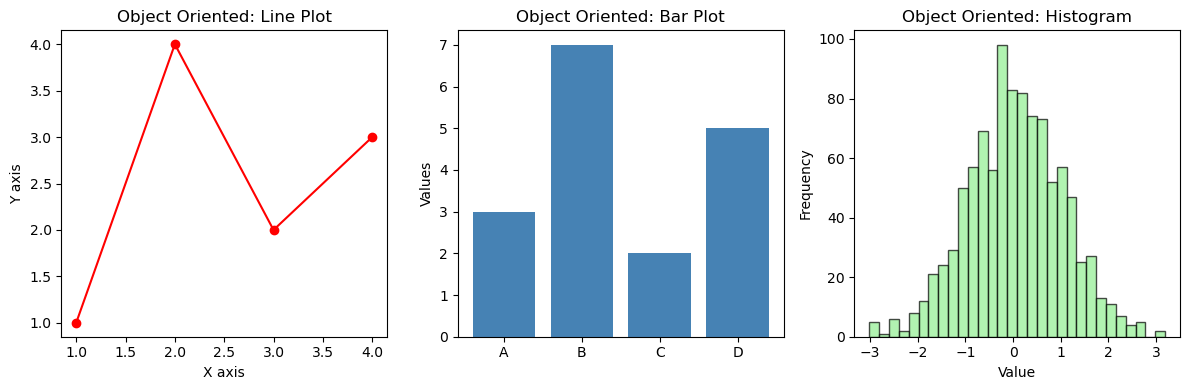

In [4]:
fig, axes = plt.subplots(1, 3, figsize = (12, 4))

# Same plots using object oriented interface
axes[0].plot([1, 2, 3, 4], [1, 4, 2, 3], 'ro-')
axes[0].set_title('Object Oriented: Line Plot')
axes[0].set_xlabel('X axis')
axes[0].set_ylabel('Y axis')

axes[1].bar(['A', 'B', 'C', 'D'], [3, 7, 2, 5], color='steelblue')
axes[1].set_title('Object Oriented: Bar Plot')
axes[1].set_ylabel('Values')

x = np.random.randn(1000)
axes[2].hist(x, bins=30, color='lightgreen', alpha=0.7, edgecolor = 'black')
axes[2].set_title('Object Oriented: Histogram')
axes[2].set_xlabel('Value')
axes[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Basic Plot Types

__Real-World Dataset: Stock Market Analysis__  
Let's use actual stock market data to practice basic plotting.

In [5]:
stock_data = pd.read_csv("../datasets/stock-market/Stocks/aac.us.txt")
print("Sample data:")
stock_data.head()

Sample data:


,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-10-02,20.00,20.10,17.60,18.50,2799073,0
1,2014-10-03,18.20,18.75,18.05,18.65,155562,0
2,2014-10-06,18.48,19.58,18.48,19.24,188229,0
3,2014-10-07,19.25,19.48,18.93,19.24,176606,0
4,2014-10-08,19.17,19.48,18.90,19.13,37046,0


In [6]:
# Change date datatype to datetime
stock_data['Date'] = pd.to_datetime(stock_data['Date'])
stock_data = stock_data.sort_values("Date")

# check data types
stock_data.dtypes

Date       datetime64[ns]
Open              float64
High              float64
Low               float64
Close             float64
Volume              int64
OpenInt             int64
dtype: object

In [7]:
# sample data
stock_data.head(10)

,Date,Open,High,Low,Close,Volume,OpenInt
0,2014-10-02,20.00,20.10,17.60,18.50,2799073,0
1,2014-10-03,18.20,18.75,18.05,18.65,155562,0
2,2014-10-06,18.48,19.58,18.48,19.24,188229,0
3,2014-10-07,19.25,19.48,18.93,19.24,176606,0
4,2014-10-08,19.17,19.48,18.90,19.13,37046,0
5,2014-10-09,19.16,19.55,19.00,19.25,114523,0
6,2014-10-10,19.25,19.36,18.77,19.00,34775,0
7,2014-10-13,18.92,19.10,18.64,19.00,52514,0
8,2014-10-14,19.03,19.03,17.91,18.10,126457,0
9,2014-10-15,18.07,19.50,18.00,19.43,46156,0


### 1. Line Plots

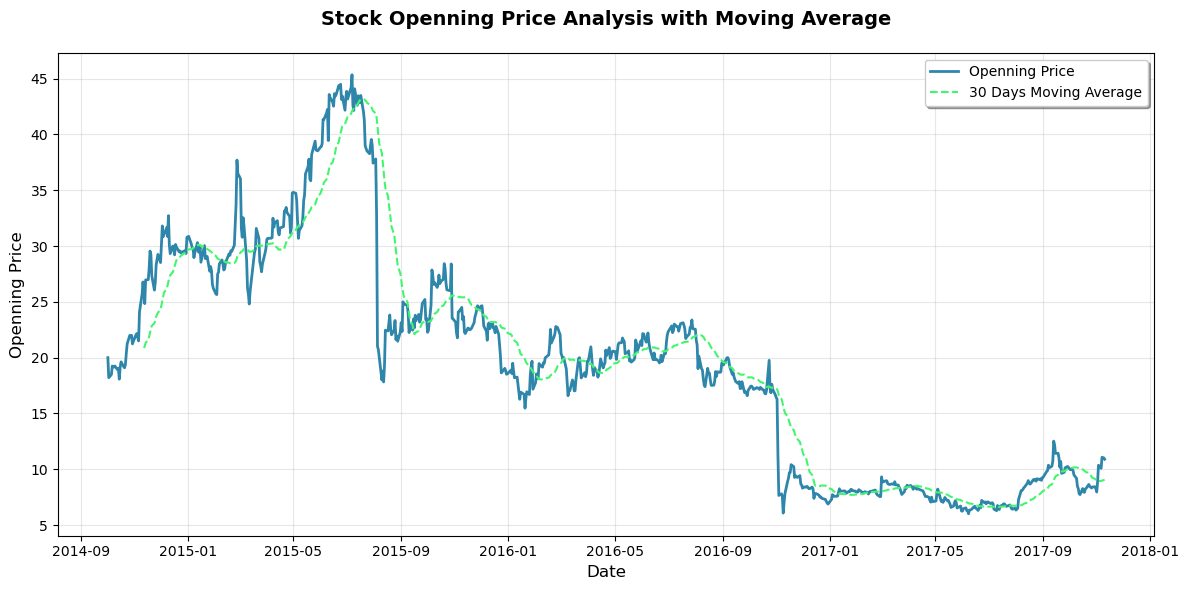

In [8]:
# Create figure and ax
fig, ax = plt.subplots(figsize = (12, 6))

# Open price line
ax.plot(stock_data['Date'], stock_data['Open'], color = '#2E86AB', linewidth = 2, label = 'Openning Price')

# Let's add moving average(7-days)
stock_data['MA30'] = stock_data['Open'].rolling(window = 30).mean()
ax.plot(stock_data['Date'], stock_data['MA30'], color = '#42f56f', linewidth = 1.5, linestyle = '--', label = "30 Days Moving Average")
ax.set_title("Stock Openning Price Analysis with Moving Average", fontsize = 14, fontweight = 'bold', pad = 20)
ax.set_xlabel("Date", fontsize = 12)
ax.set_ylabel("Openning Price", fontsize  =12)
ax.grid(True, alpha = 0.3)
ax.legend(frameon = True, fancybox = True, shadow = True)
plt.tight_layout()
plt.show()

### 2. Scatter Plot

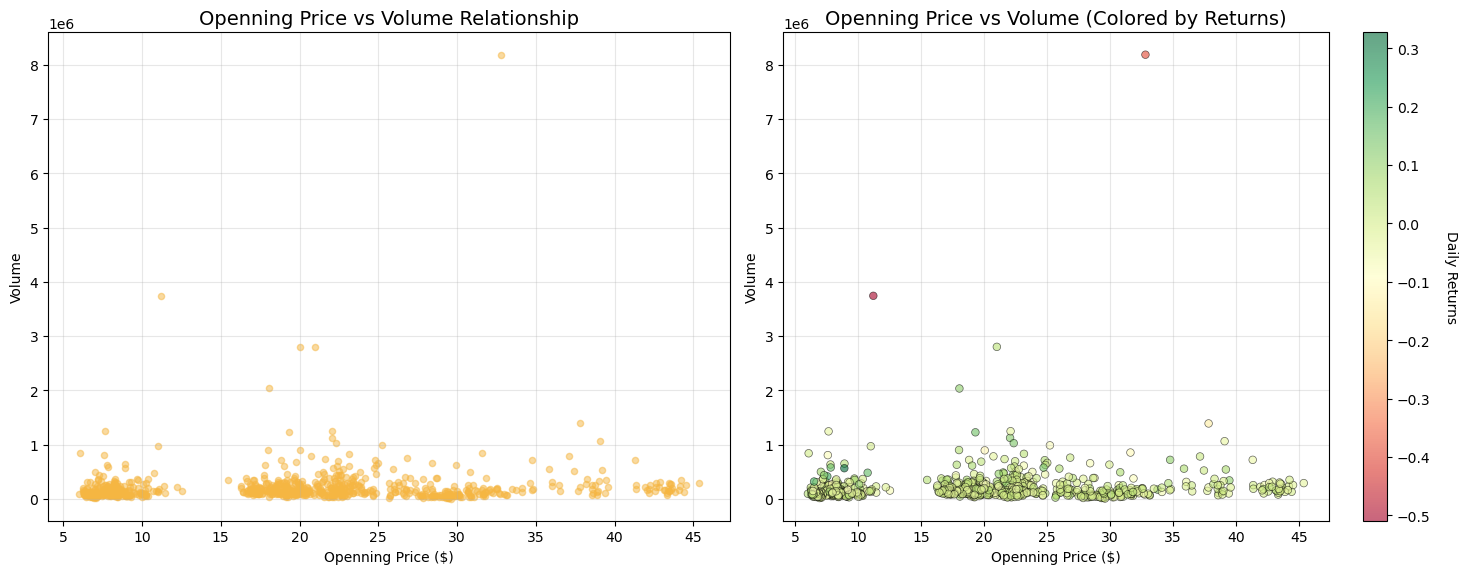

In [9]:
# Scatter plot: Openning Price vs Volume relationship
fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

# Basic scatter plot
ax1.scatter(stock_data['Open'], stock_data['Volume'], c = '#f5b642', s = 20, alpha = 0.5)
ax1.set_title("Openning Price vs Volume Relationship", fontsize = 14)
ax1.set_xlabel("Openning Price ($)")
ax1.set_ylabel("Volume")
ax1.grid(True, alpha = 0.3)

# Enhanced Scatter plot with color mapping
# Let's add return column
stock_data['Returns'] = stock_data['Close'].pct_change()
sc = ax2.scatter(stock_data['Open'], stock_data['Volume'], c = stock_data['Returns'], s = 30, alpha = 0.6,
           cmap='RdYlGn', edgecolors='black', linewidth=0.5)
ax2.set_title("Openning Price vs Volume (Colored by Returns)", fontsize = 14)
ax2.set_xlabel("Openning Price ($)")
ax2.set_ylabel("Volume")
ax2.grid(True, alpha = 0.3)

# Add colorbar
cbar = plt.colorbar(sc, ax = ax2)
cbar.set_label("Daily Returns", rotation=270, labelpad=20)

plt.tight_layout()
plt.show()

### 3. Bar Charts

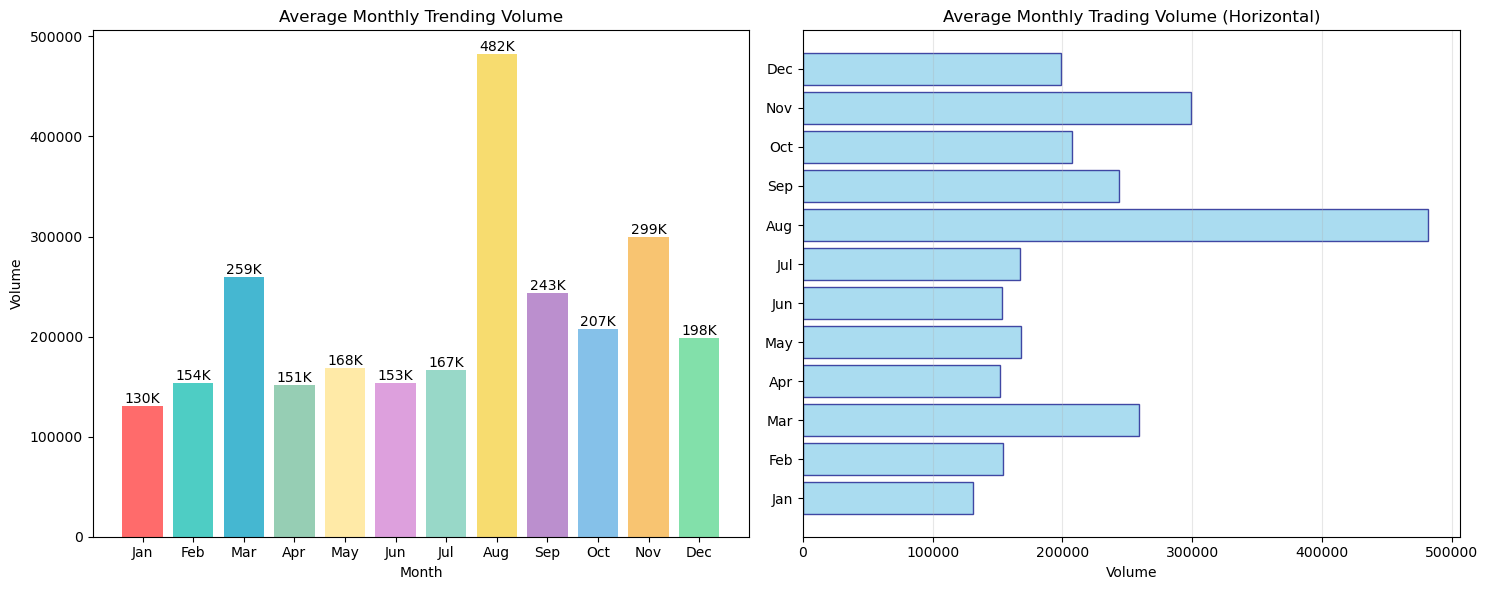

In [10]:
# Monthly volume analysis
stock_data['Month'] = stock_data['Date'].dt.month
monthly_volume = stock_data.groupby('Month')['Volume'].mean()
month_names = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 
               'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (15, 6))

# Vertical bar plot
bar1 = ax1.bar(month_names, monthly_volume.values,
                color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4', 
                       '#FFEAA7', '#DDA0DD', '#98D8C8', '#F7DC6F',
                       '#BB8FCE', '#85C1E9', '#F8C471', '#82E0AA'])
ax1.set_title("Average Monthly Trending Volume")
ax1.set_xlabel("Month")
ax1.set_ylabel("Volume")

# Add value labels on bars
for bar in bar1:
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height,
             f'{int(height/1000)}K',
             ha='center', va='bottom', fontsize=10)

# Horizontal bar chart
bar2 = ax2.barh(month_names, monthly_volume.values,
                 color='skyblue', alpha=0.7, edgecolor='navy')
ax2.set_title('Average Monthly Trading Volume (Horizontal)')
ax2.set_xlabel('Volume')
ax2.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## Basic Customization

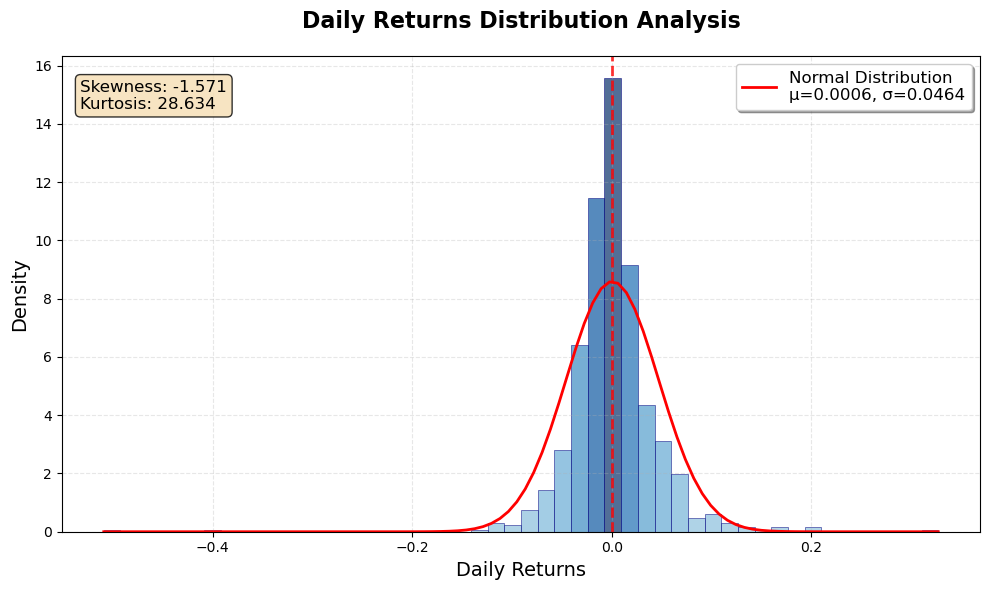

In [11]:
# Customization example
fig, ax = plt.subplots(figsize = (10, 6))

returns_data = stock_data['Returns'].dropna()

# Create histogram
n, bins, patches = ax.hist(returns_data, bins = 50, density = True, alpha = 0.7, 
                           color = 'skyblue', edgecolor = 'navy', linewidth = 0.5)

# Overlay normal distribution curve
mu, sigma = returns_data.mean(), returns_data.std()
x_norm = np.linspace(returns_data.min(), returns_data.max(), 100)
y_norm = ((1/(sigma * np.sqrt(2 * np.pi))) * 
          np.exp(-0.5 * ((x_norm - mu) / sigma) ** 2))
ax.plot(x_norm, y_norm, 'r-', linewidth=2, label=f'Normal Distribution\nμ={mu:.4f}, σ={sigma:.4f}')

# Professional styling
ax.set_title('Daily Returns Distribution Analysis', 
             fontsize=16, fontweight='bold', pad=20)
ax.set_xlabel('Daily Returns', fontsize=14)
ax.set_ylabel('Density', fontsize=14)
ax.grid(True, alpha=0.3, linestyle='--')
ax.legend(fontsize=12, frameon=True, fancybox=True, shadow=True)

# Color gradient for histogram bars based on height
for i, (patch, height) in enumerate(zip(patches, n)):
    # Color based on height (darker = higher frequency)
    color_intensity = height / max(n)
    patch.set_facecolor(plt.cm.Blues(0.4 + 0.6 * color_intensity))

# Add statistical annotations
ax.axvline(mu, color='red', linestyle='--', alpha=0.8, linewidth=2)
ax.text(0.02, 0.95, f'Skewness: {returns_data.skew():.3f}\nKurtosis: {returns_data.kurtosis():.3f}', 
        transform=ax.transAxes, fontsize=12, verticalalignment='top',
        bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.8))

plt.tight_layout()
plt.show()

## Practice Exercise
__Challenge: Stock Performance Dashboard__  
Create a 2x2 subplot dashboard showing:

1. openning price timeline with volume bars
2. Returns distribution
3. Monthly volume comparison
4. Price vs Volume scatter

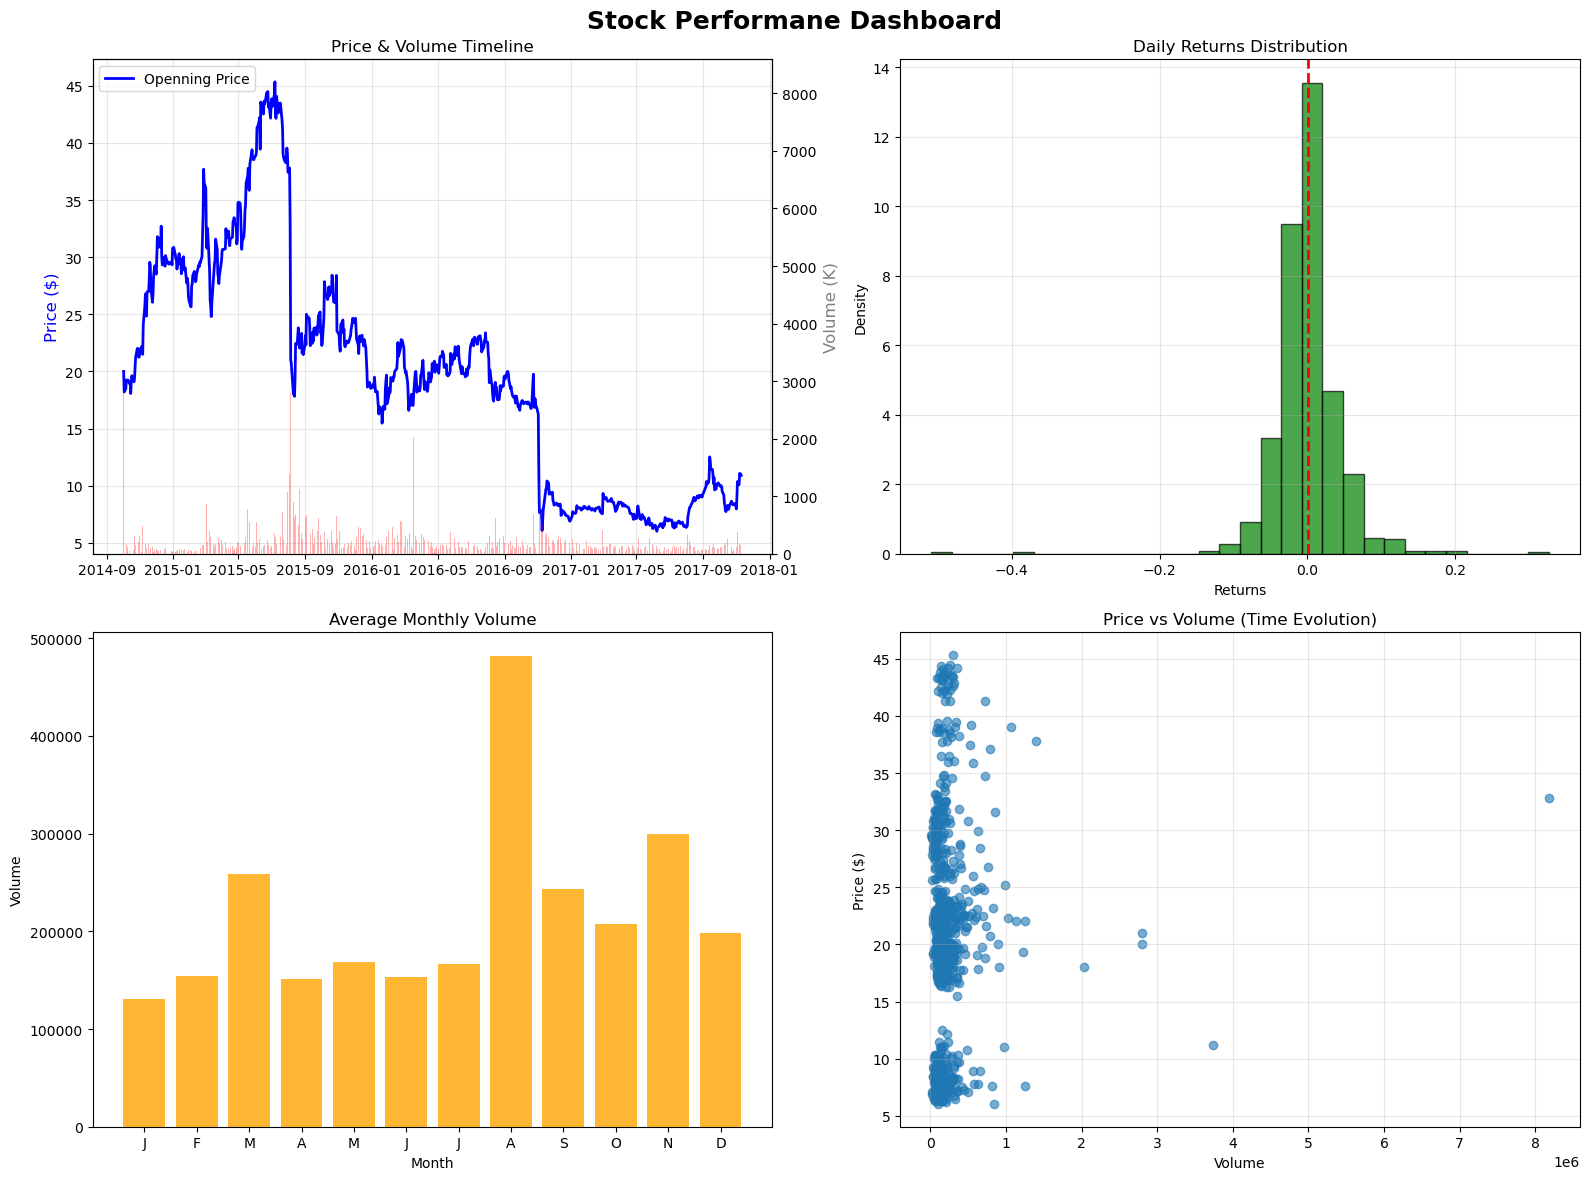

In [13]:
# Create 2 x 2 subplot
fig, axes = plt.subplots(2, 2, figsize = (16, 12))
fig.suptitle("Stock Performane Dashboard", fontsize = 18, fontweight = 'bold')

# Openning price timeline
ax1_twin = axes[0, 0].twinx()
axes[0, 0].plot(stock_data['Date'], stock_data['Open'], 'b', linewidth = 2, label = "Openning Price")
ax1_twin.bar(stock_data['Date'], stock_data["Volume"]/1000, alpha = 0.3, color = 'red')
axes[0, 0].set_ylabel('Price ($)', color='blue', fontsize=12)
ax1_twin.set_ylabel('Volume (K)', color='gray', fontsize=12)
axes[0, 0].set_title('Price & Volume Timeline')
axes[0, 0].grid(True, alpha=0.3)
axes[0, 0].legend(loc='upper left')

# Plot 2: Returns distribution
axes[0, 1].hist(stock_data['Returns'].dropna(), bins=30, alpha=0.7, color='green', density=True, edgecolor = 'black')
axes[0, 1].axvline(stock_data['Returns'].mean(), color='red', linestyle='--', linewidth=2)
axes[0, 1].set_title('Daily Returns Distribution')
axes[0, 1].set_xlabel('Returns')
axes[0, 1].set_ylabel('Density')
axes[0, 1].grid(True, alpha=0.3)

# Plot 3: Monthly volume comparison
monthly_vol = stock_data.groupby(stock_data['Date'].dt.month)['Volume'].mean()
month_names = ['J', 'F', 'M', 'A', 'M', 'J', 'J', 'A', 'S', 'O', 'N', 'D']
axes[1, 0].bar(range(len(monthly_vol)), monthly_vol.values, color='orange', alpha=0.8)
axes[1, 0].set_title('Average Monthly Volume')
axes[1, 0].set_xlabel('Month')
axes[1, 0].set_ylabel('Volume')
axes[1, 0].set_xticks(range(len(monthly_vol)))
axes[1, 0].set_xticklabels(month_names[:len(monthly_vol)])

# Plot 4: Price vs Volume scatter
axes[1, 1].scatter(stock_data['Volume'], stock_data['Open'], alpha=0.6)
axes[1, 1].set_title('Price vs Volume (Time Evolution)')
axes[1, 1].set_xlabel('Volume')
axes[1, 1].set_ylabel('Price ($)')
axes[1, 1].grid(True, alpha=0.3)


plt.tight_layout()
plt.show()

# Save the dashboard
fig.savefig("../outputs/dashboard.png", dpi=300, bbox_inches="tight")
fig.savefig("../outputs/dashboard.pdf", bbox_inches="tight")